# Multiple Linear Regression: Predicting CO2 Emissions
This notebook demonstrates how to implement **Multiple Linear Regression** using Scikit-Learn.

## About the Author
This notebook was created by **Aimal Khan**.

### Step 1: Import Required Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Step 2: Load Dataset

In [ ]:
# Load dataset
file_path = '../datasets/CO2-emissions.csv'  # Update with correct path
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Step 3: Select Features and Target Variable

In [32]:
# Select independent variables (features)
X = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']].values

# Select dependent variable (target)
Y = df[['CO2 Emissions(g/km)']].values

### Step 4: Split Data into Training and Testing Sets

In [ ]:
# Split dataset into training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

### Step 5: Train the Multiple Linear Regression Model

In [34]:
# Train Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Print coefficients
print(f"Intercept (b0): {model.intercept_[0]:.4f}")
print(f"Coefficients (b1, b2, b3): {model.coef_[0]}")

Intercept (b0): 51.5300
Coefficients (b1, b2, b3): [ 5.59471283  6.38079806 13.27032994]


### Step 6: Make Predictions

In [35]:
# Predict CO2 emissions on test data
Y_pred = model.predict(X_test)

### Step 7: Evaluate the Model

In [36]:
# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)

# Calculate R-squared Score
r2 = r2_score(Y_test, Y_pred)

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared Score (R²): {r2:.4f}")

Mean Squared Error (MSE): 421.92
R-Squared Score (R²): 0.8773


### Step 8: Make a Prediction for a New Car

In [37]:
# New car data (Engine Size = 3.0L, Cylinders = 6, Fuel Consumption = 10.5 L/100 km)
new_car = np.array([[3.0, 6, 10.5]])

# Predict CO2 emissions
predicted_co2 = model.predict(new_car)

print(f"Predicted CO2 Emissions: {predicted_co2[0][0]:.2f} g/km")

Predicted CO2 Emissions: 245.94 g/km


### Step 9: Visualizing Feature Importance

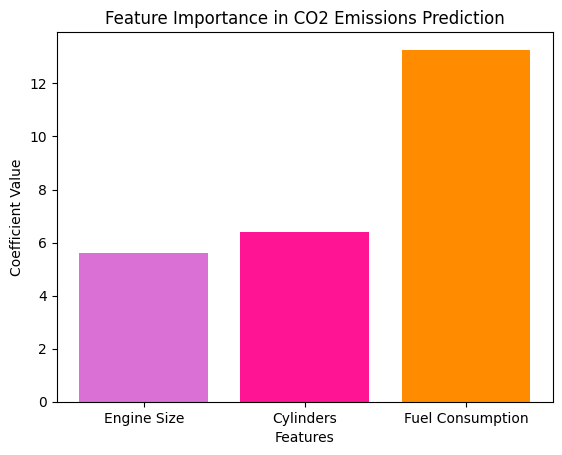

In [38]:
# Plot feature importance (coefficients)
features = ['Engine Size', 'Cylinders', 'Fuel Consumption']
coefficients = model.coef_[0]

plt.bar(features, coefficients, color=['orchid', 'deeppink', 'darkorange'])
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in CO2 Emissions Prediction")
plt.show()

visually represent how the regression model predicts CO2 emissions using two independent variables (Engine Size & Cylinders)

C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


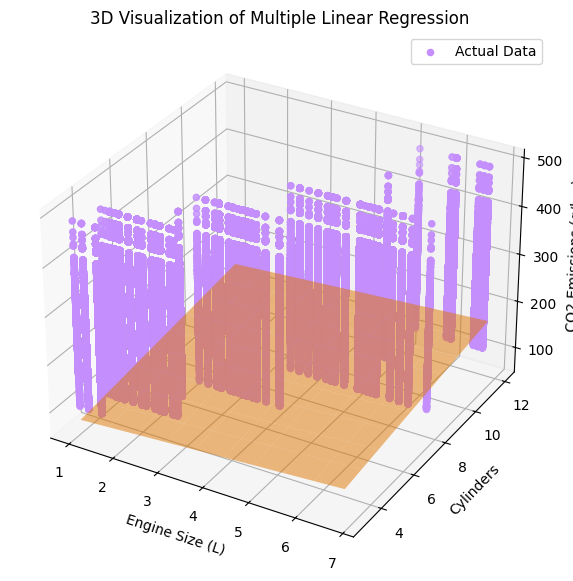

In [39]:
# Create a 3D scatter plot with regression plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(X_test[:, 0], X_test[:, 1], Y_test, color=sns.xkcd_rgb['liliac'], label='Actual Data')

# Generate a mesh grid for prediction surface
x_surf, y_surf = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 10), np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 10))
z_surf = (model.intercept_[0] + model.coef_[0][0] * x_surf + model.coef_[0][1] * y_surf)

# Plot regression surface
ax.plot_surface(x_surf, y_surf, z_surf, color=sns.xkcd_rgb['pumpkin'], alpha=0.5)

# Labels
ax.set_xlabel("Engine Size (L)")
ax.set_ylabel("Cylinders")
ax.set_zlabel("CO2 Emissions (g/km)")
ax.set_title("3D Visualization of Multiple Linear Regression")

plt.legend()
plt.show()
